Données:

* Température (banque mondiale) https://climateknowledgeportal.worldbank.org/download-data

* Glacier data http://glims.colorado.edu/glacierdata/

* NASA https://nsidc.org/data/NSIDC-0218/versions/1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Température moyenne par an - données banque mondiale

In [2]:
df = pd.read_csv('data/tas_1901_2016_GRL.csv')

In [3]:
df.columns = [i.strip() for i in df.columns]

In [4]:
df['year-month'] = df['Year'].astype(str) + '-' + df['Month'].str.strip() + '-01'

In [5]:
df.index = pd.to_datetime(df['year-month'])

In [7]:
plt.style.use('fivethirtyeight')

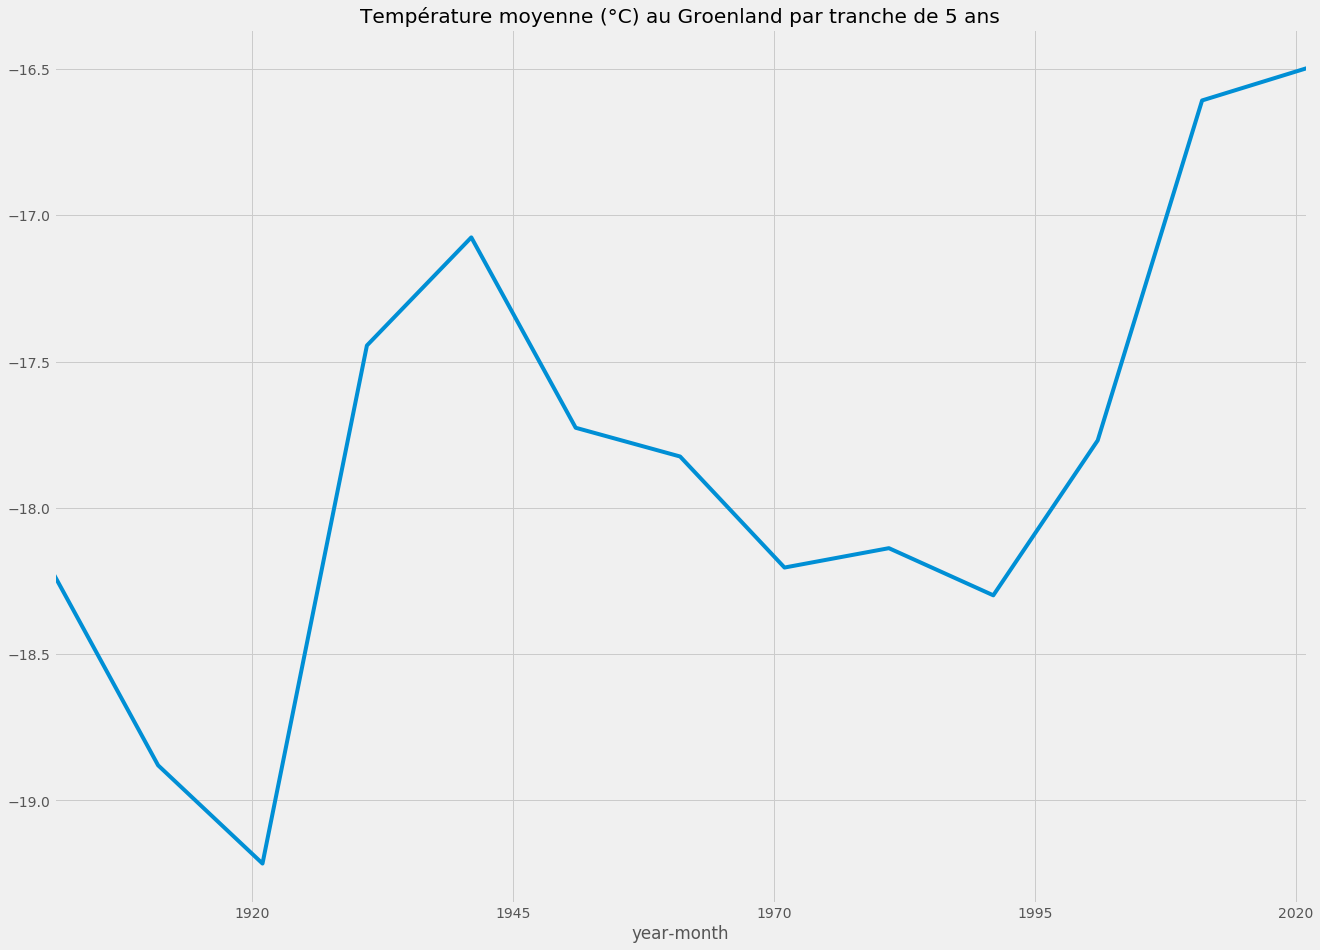

In [39]:
df['Temperature - (Celsius)'].resample('10Y').mean().plot(figsize=(20, 15), title='Température moyenne (°C) au Groenland par tranche de 5 ans')
plt.savefig('wsdljslkjslkj.png')

In [41]:
dfy = pd.DataFrame(df['Temperature - (Celsius)'].resample('10Y').mean())

In [42]:
dfy.reset_index(inplace=True)

In [43]:
dfy.columns = ['Année', 'Température moyenne']

In [44]:
dfy['Année'] = dfy['Année'].dt.year

In [45]:
df.head()

,Temperature - (Celsius),Year,Month,Country,ISO3,year-month
year-month,,,,,,
1901-01-01,-28.489,1901,Jan,Greenland,GRL,1901-Jan-01
1901-02-01,-22.256,1901,Feb,Greenland,GRL,1901-Feb-01
1901-03-01,-28.488,1901,Mar,Greenland,GRL,1901-Mar-01
1901-04-01,-24.147,1901,Apr,Greenland,GRL,1901-Apr-01
1901-05-01,-14.213,1901,May,Greenland,GRL,1901-May-01


In [46]:
dfy['Décade'] = dfy['Année'].apply(lambda x: "{}-{}".format(x, x+9))

In [47]:
dfx = dfy[:-1].round(2).copy()

In [49]:
dfx.to_excel('groenland-temperatures.xls')

In [38]:
!open .